# Adagrad

## Vismo anteriormente que momento é usado para mitigar as oscilações da função de custo do modelo até até que o mesmo chegue no mínimo global.

## Vamos supor dois conjuntos de dados, um Denso(que a maioria dos valores são diferentes de zero) e um Sparse( A maioria dos dados possuem valores iguais a zero, um exemplo simples é quando transformamos atributos nominais em numéricos), como temos duas matrizes de dados diferentes, é de se esperar que os treinos de ambas serão diferentes, e que os mesmos parâmetros de umma não necessariamente funcionariam na outra.

## Então é de se esperar que uma tenha um aprendizado mais robusto que a outra para uma determinada taxa de aprendizado. Assim, a ideia do Adagrad é modificar a taxa de aprendizado para que o modelo tenha um treino mais consistente, já que quanto menor o erro, menor deve ser a taxa de aprendizado para que o modelo não divirja

##  A formula que modela a taxa de aprendizado é

## $\alpha_t = \frac{\alpha}{\sqrt{\sum dL/dw_i + \epsilon}}$


# começamos com uma taxa $\alpha$ e iremos atualizar o peso de acordo com os erros anteriores de modo que o mesmo diminua com o número de iterações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
f = lambda x,w: x @ w # Função que descreve uma parabola para o nosso caso, em que temos
# f: X[:,0]*w[0] + X[:,1]*w[1] + X[:,2]*w[2]

w = np.random.normal(0,1,(3,1)) # pesos

X = np.arange(-20,20,0.1).reshape(-1,1) # dados

y = X**2 + 5*X + 1 # função a ser encontrada, que não conhecemos, porém sabemos é uma função polinomial 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [17]:
def Adagrad(X,y,w,gamma= 0.9,lr = 0.0000001):
    loss_a = [0 for i in range(len(w))]
    for _ in range(1000):
        yhat = f(X,w)
        loss = np.mean((y - yhat)**2)
        for i in range(len(w)):
            w[i] +=  lr/np.sqrt(1e-6+loss_a[i])*((y-yhat).T @ X[:,i])/len(yhat)
            loss_a[i] += ((lr*(y-yhat).T @ X[:,i])/len(yhat))**2
        print('loss:',loss)

    return w.reshape(-1,1)

In [18]:
for i in range(50):
    w = Adagrad(X_in,y,w)
    print(w)

loss: 23894.36633848376
loss: 104900.97797482625
loss: 4910.188915801266
loss: 3128.838500661251
loss: 2641.209405394132
loss: 2470.1055470225833
loss: 2379.6403852076687
loss: 2310.8234963582513
loss: 2248.747182423469
loss: 2189.6073715611606
loss: 2132.4052683722657
loss: 2076.8522737607927
loss: 2022.8405529766057
loss: 1970.3091780479933
loss: 1919.2102442822452
loss: 1869.5002570466254
loss: 1821.1379080529346
loss: 1774.0834689693868
loss: 1728.2985960652027
loss: 1683.7462408648187
loss: 1640.3905895903006
loss: 1598.1970117549122
loss: 1557.1320128330856
loss: 1517.1631896201607
loss: 1478.2591878345324
loss: 1440.389661758825
loss: 1403.5252357844613
loss: 1367.637467746786
loss: 1332.698813948852
loss: 1298.6825957795868
loss: 1265.5629678384296
loss: 1233.3148874842798
loss: 1201.9140857318669
loss: 1171.3370394235412
loss: 1141.5609446090061
loss: 1112.5636910697106
loss: 1084.323837928523
loss: 1056.8205902889308
loss: 1030.0337768513825
loss: 1003.9438284575269
loss: 978

Pesos finais:  [1.00093002 5.00005599 0.7768075 ]


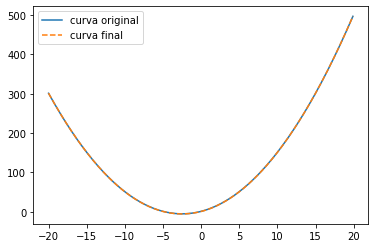

In [19]:
print('Pesos finais: ', w.flatten())

plt.plot(X,y,label = 'curva original')
plt.plot(X,f(X_in,w),'--',label = 'curva final')
plt.legend()